# Import libraries

In [1]:
import time
from Asset_degradation import *

# Global variables

In [2]:
short_term = Failure_mode_degradation(initial_condition = 10, failure_threshold = 100, average_degradation_parameter = 2, variability_degradation_parameter = 4,
                                      degradation = [], inspection = 15, time_maintenance_threshold = 100, condition_maintenance_threshold = 100, inspection_costs = 10, preventive_maintenance_costs= 100, corrective_maintenance_costs = 200) #short-term failure mode definition
long_term = Failure_mode_degradation(initial_condition = 0, failure_threshold = 200, average_degradation_parameter = 0.1, variability_degradation_parameter = 2,
                                      degradation = [], inspection = 15, time_maintenance_threshold = 200, condition_maintenance_threshold = 200, inspection_costs = 10, preventive_maintenance_costs= 200, corrective_maintenance_costs = 1000) #long-term failure mode definition
shock_threshold = 50 #threshold of activation for the shocks
lameda_shocks = 0.5 #shocks per time step
shock_intensity_mean = 7 #normal distribution
shock_intensity_stdev = 2 #normal distribution
simulating_periods = 1000

# What is missing?

In [3]:
#Falta introduzir o erro de inspeção na manutenção continua manutenção com inspeção
#Falta introduzir os cenários

# Test developed functions

## Simulate degradation (example)

In [4]:
start_time = time.time()
short_term, long_term = simulate_degradation(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods)
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

--- Simulation computational time = 0.03434586524963379 seconds ---


## Get maintenance interventions (example)

In [5]:
st_teste = maintenance_interventions(short_term.degradation, short_term.initial_condition, short_term.failure_threshold)
lt_teste = maintenance_interventions(long_term.degradation, long_term.initial_condition, long_term.failure_threshold)

# Get MTBF of each failure mode (example)

In [6]:
print(f"The mtbf for the short-term={short_term.compute_mtbf('wienner')}")
print(f"The mtbf for the long-term={long_term.compute_mtbf('gamma')}")

The mtbf for the short-term=45.0
The mtbf for the long-term=1000.2500000000001


## Plot of the simulated degradation (example)

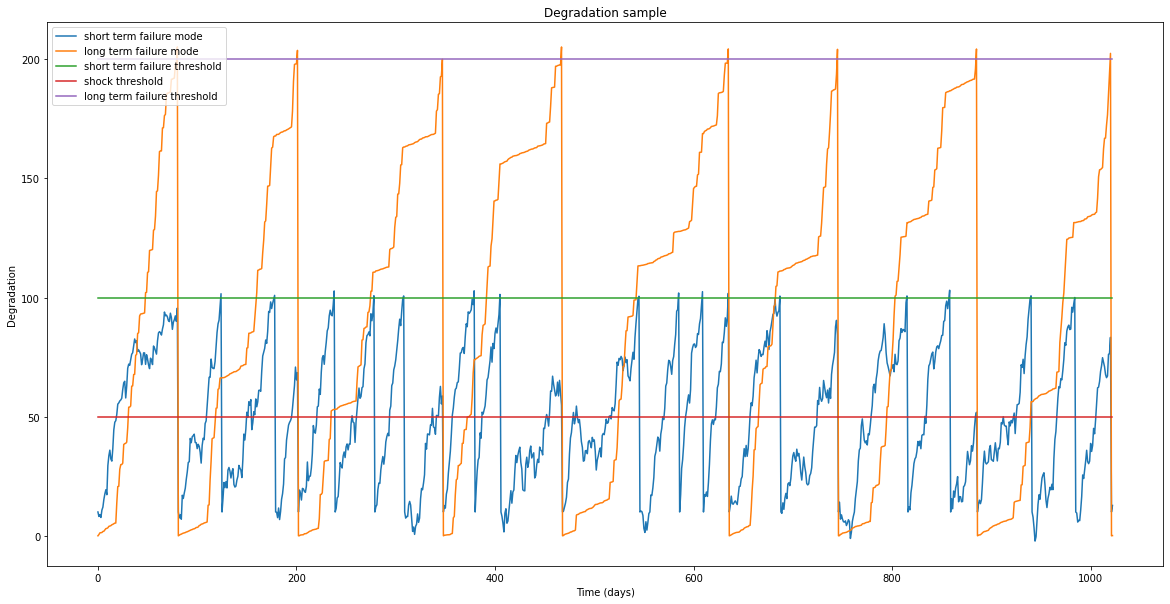

In [7]:
degradation_plot(short_term.degradation, short_term.failure_threshold, shock_threshold, long_term.degradation, long_term.failure_threshold)

# Test maintenance policies optimization - example for the Corrective Maintenance (CM)

In [8]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'CM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
_, cost, _ = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a corrective maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Preventive maintenance was not required!
Expected maintenance cost per unit of time using a corrective maintenance policy = 11.06
--- Simulation computational time = 0.48909616470336914 seconds ---


# Test best maintenance policies optimization - example for the best cost (replace immediately before failure)

In [9]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'PM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
_, cost, _ = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a perfect maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Preventive maintenance was not required!
Expected maintenance cost per unit of time using a perfect maintenance policy = 3.89
--- Simulation computational time = 0.4044511318206787 seconds ---


# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)
# assuming failure independence

In [10]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'ITBM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Optimal decisions
lt_optimal_t = results[results['lt_expected_maintenance_cost_per_unit_of_time']==np.min(results['lt_expected_maintenance_cost_per_unit_of_time'])].index[0]*policy_step
st_optimal_t = results[results['st_expected_maintenance_cost_per_unit_of_time']==np.min(results['st_expected_maintenance_cost_per_unit_of_time'])].index[0]*policy_step
print(f'The long-term optimal replacement period is {lt_optimal_t} || The short-term optimal replacement period is {st_optimal_t}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal replacement period is 100.0 || The short-term optimal replacement period is 35.0
Expected maintenance cost per unit of time using a time based maintenance policy = 6.97
--- Simulation computational time = 4.869919061660767 seconds ---


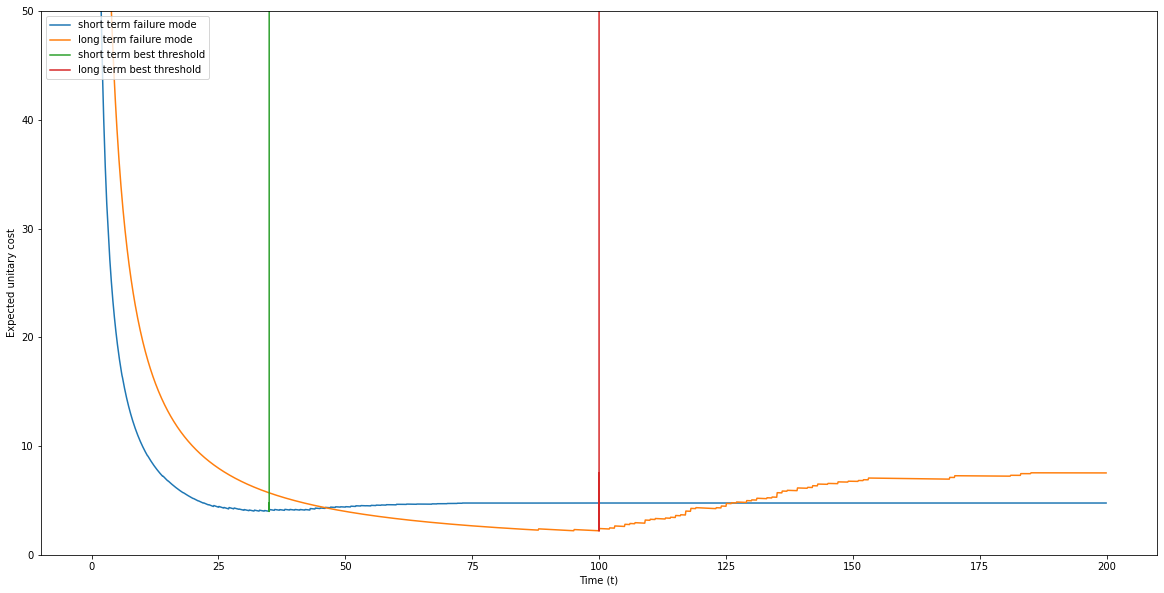

In [11]:
policy_costs_plot(list(results['st_expected_maintenance_cost_per_unit_of_time']), list(results['lt_expected_maintenance_cost_per_unit_of_time']), time_limit, policy_step, "Time (t)", 50)

# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)

In [ ]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'TBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decision
print(f'The long-term optimal time threshold is {optimal_decision.split("/")[0]} || The short-term optimal time threshold is {optimal_decision.split("/")[1]}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a continuous time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maintenance was not required!
Corrective maint

In [ ]:
#alterar texto das legendas. tenho de atualizar a função
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect continuous inspection (CBM)

In [ ]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'CBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decision
print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a continuous condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

In [ ]:
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the optimized Continuous Based Maintenance with perfect inspection (ICBM)

In [ ]:
#Define maintenance policy
optimal_cost, inspection_time_list = list(), list()
maintenance_policy = 'ICBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

for inspection_time in range(10,101,5):

    #Start clock
    start_time = time.time()

    #Define inspection time
    short_term.inspection, long_term.inspection = inspection_time,inspection_time

    #Compute maintenance policy
    optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

    #Output optimal decisions
    print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]} with an inspection period of {short_term.inspection}')

    #Output optimal costs
    print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

    #Save the obtained result given the inspection
    optimal_cost.append(cost), inspection_time_list.append(inspection_time)

    #print computational time
    print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

In [ ]:
#build inspection policy
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.array(inspection_time_list), np.array(optimal_cost))

#Plot labeling
ax.set(xlabel="Inspection time (t)", ylabel='Expected unitary cost')

#add thresholds
ax.plot([inspection_time_list[optimal_cost.index(min(optimal_cost))]] * len(inspection_time_list), np.array(optimal_cost), label="Best inspection time")

#Plot ylim
plt.ylim(0,max(optimal_cost))

#Show results
plt.legend(loc='upper left')
plt.show()

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect inspection (ICBM)

In [ ]:
#Start clock
start_time = time.time()

#Define maintenance policy
short_term.inspection, long_term.inspection = inspection_time_list[optimal_cost.index(min(optimal_cost))], inspection_time_list[optimal_cost.index(min(optimal_cost))]
maintenance_policy = 'ICBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decisions
print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]} with an inspection period of {short_term.inspection}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

In [ ]:
plot_cbm_maintenance_costs(results, 60)